<a href="https://colab.research.google.com/github/rochinha23/Curso-Data-Science-e-Machine-Learning-com-Estatistica-e-Python/blob/main/Regressao_linear_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Regressão Linear - Predição de Idade**

importando bibliotecas

In [84]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


ler train.csv e test.csv

In [85]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train (1).csv


In [86]:
from google.colab import  files
uploaded2 = files.upload()

Saving test.csv to test (1).csv


In [87]:
import io
train = pd.read_csv(io.BytesIO(uploaded['train.csv']))
test = pd.read_csv(io.BytesIO(uploaded2['test.csv']))

transformar definir o Id do Passageiro como Index

In [88]:
train.set_index('PassengerId', inplace=True)

In [89]:
test.set_index('PassengerId', inplace=True)

Verificar shape dos dois

In [90]:
train.shape, test.shape

((891, 11), (418, 10))

Criar coluna "Survived" no test set

In [91]:
test['Survived'] = np.nan

Conferir shape novamente

In [92]:
train.shape, test.shape

((891, 11), (418, 11))

Concatenar train e test set

In [93]:
data = pd.concat([train, test], sort=False)

In [94]:
data.shape

(1309, 11)

Traduzindo colunas

In [95]:
data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [96]:
data.columns = ['Sobreviveu', 'Classe', 'Nome', 'Sexo', 'Idade', 
                ' IrmaosConjuge', 'PaisFilhos', 'Bilhete','Tarifa', 
                'Cabine', 'Embarque']

  Traduzindo Sexo

In [97]:
data['Sexo'] = data['Sexo'].map({'male':'homem', 'female':'mulher'})

In [98]:
data['Sexo'].head()

PassengerId
1     homem
2    mulher
3    mulher
4    mulher
5     homem
Name: Sexo, dtype: object

Averiguar dados nulos

In [99]:
data.isnull().sum()

Sobreviveu         418
Classe               0
Nome                 0
Sexo                 0
Idade              263
 IrmaosConjuge       0
PaisFilhos           0
Bilhete              0
Tarifa               1
Cabine            1014
Embarque             2
dtype: int64

Remover Cabine

In [100]:
data.drop('Cabine', axis=1, inplace=True)

Checar dados nulos novamente

In [101]:
data.isnull().sum()

Sobreviveu        418
Classe              0
Nome                0
Sexo                0
Idade             263
 IrmaosConjuge      0
PaisFilhos          0
Bilhete             0
Tarifa              1
Embarque            2
dtype: int64

Preencher dados nulos de "Embarque" com a moda

In [102]:
data['Embarque'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [103]:
moda = data['Embarque'].mode()[0]
moda

'S'

In [104]:
data['Embarque'].fillna(moda, inplace=True)

Checar dados nulos novamente

In [105]:
data.isnull().sum()

Sobreviveu        418
Classe              0
Nome                0
Sexo                0
Idade             263
 IrmaosConjuge      0
PaisFilhos          0
Bilhete             0
Tarifa              1
Embarque            0
dtype: int64

Preencher "Tarifa" faltando com a média

In [106]:
media = data['Tarifa'].mean()

In [107]:
data['Tarifa'].fillna(media,inplace=True)

Checar dados nulos

In [108]:
data.isnull().sum()

Sobreviveu        418
Classe              0
Nome                0
Sexo                0
Idade             263
 IrmaosConjuge      0
PaisFilhos          0
Bilhete             0
Tarifa              0
Embarque            0
dtype: int64

Verificar correlações

In [109]:
data.corr()

,Sobreviveu,Classe,Idade,IrmaosConjuge,PaisFilhos,Tarifa
Sobreviveu,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Classe,-0.338481,1.000000,-0.408106,0.060832,0.018322,-0.558477
Idade,-0.077221,-0.408106,1.000000,-0.243699,-0.150917,0.178229
IrmaosConjuge,-0.035322,0.060832,-0.243699,1.000000,0.373587,0.160224
PaisFilhos,0.081629,0.018322,-0.150917,0.373587,1.000000,0.221522
Tarifa,0.257307,-0.558477,0.178229,0.160224,0.221522,1.000000


Visualizar correlações com "heatmap"

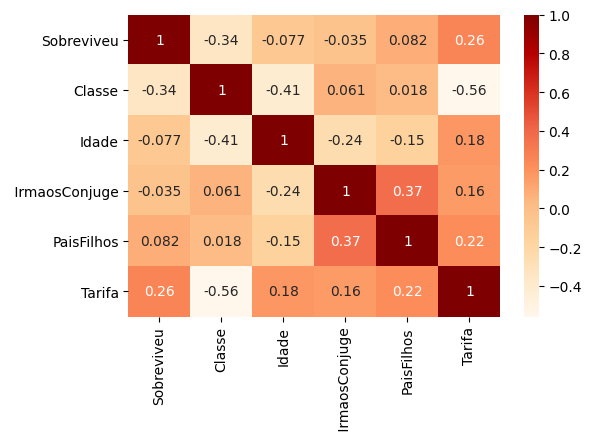

In [110]:
f, ax = plt.subplots(dpi=100)
sns.heatmap(data.corr(), annot=True, cmap='OrRd')

Remover coluna "Sobreviveu"

Aparentemente não tem muita correlação com idade, e está faltando bastante dados

In [111]:
data.drop('Sobreviveu', axis=1, inplace=True)

Checando dados nulos

In [112]:
data.isnull().sum()

Classe              0
Nome                0
Sexo                0
Idade             263
 IrmaosConjuge      0
PaisFilhos          0
Bilhete             0
Tarifa              0
Embarque            0
dtype: int64

**Engenharia de Recursos I**

**Criar coluna "Titulo" baseando-se na coluna "Nome"**

In [113]:
data['Nome'].str.extract('([a-zA-Z]+)\.')

,0
PassengerId,
1,Mr
2,Mrs
3,Miss
4,Mrs
5,Mr
...,...
1305,Mr
1306,Dona
1307,Mr


In [114]:
data['Titulo'] = data['Nome'].str.extract('([a-zA-Z]+)\.')

In [115]:
data['Titulo'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer', 'Dona'], dtype=object)

In [116]:
pd.crosstab(data['Titulo'], data['Sexo'])

Sexo,homem,mulher
Titulo,,
Capt,1,0
Col,4,0
Countess,0,1
Don,1,0
Dona,0,1
Dr,7,1
Jonkheer,1,0
Lady,0,1
Major,2,0


In [117]:
lista_Titulos = ['Miss', 'Master', 'Mr', 'Mrs']

In [118]:
data['Titulo'] = data['Titulo'].apply(lambda x: 'Outros' if x not in lista_Titulos else x )

In [119]:
pd.crosstab(data['Titulo'], data['Sexo'])

Sexo,homem,mulher
Titulo,,
Master,61,0
Miss,0,260
Mr,757,0
Mrs,0,197
Outros,25,9


**Traduzindo "Titulos"**

In [120]:
data.loc[data['Titulo']=='Master'].mean()

Classe             2.655738
Idade              5.482642
 IrmaosConjuge     2.049180
PaisFilhos         1.377049
Tarifa            36.008195
dtype: float64

In [121]:
titulos_traduzidos = {
    'Master': 'Menino',
    'Miss': 'Solteira',
    'Mr': 'HomemAdulto',
    'Mrs': 'Casada',
    'Outros': 'Outros'
}

In [122]:
data['Titulo'] = data['Titulo'].map(titulos_traduzidos)

**Averiguar informações do DataFrame**

In [123]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Classe          1309 non-null   int64  
 1   Nome            1309 non-null   object 
 2   Sexo            1309 non-null   object 
 3   Idade           1046 non-null   float64
 4    IrmaosConjuge  1309 non-null   int64  
 5   PaisFilhos      1309 non-null   int64  
 6   Bilhete         1309 non-null   object 
 7   Tarifa          1309 non-null   float64
 8   Embarque        1309 non-null   object 
 9   Titulo          1309 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 112.5+ KB


**Removendo "Bilhete" e "Nome"**

In [124]:
data

,Classe,Nome,Sexo,Idade,IrmaosConjuge,PaisFilhos,Bilhete,Tarifa,Embarque,Titulo
PassengerId,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",homem,22.0,1,0,A/5 21171,7.2500,S,HomemAdulto
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",mulher,38.0,1,0,PC 17599,71.2833,C,Casada
3,3,"Heikkinen, Miss. Laina",mulher,26.0,0,0,STON/O2. 3101282,7.9250,S,Solteira
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",mulher,35.0,1,0,113803,53.1000,S,Casada
5,3,"Allen, Mr. William Henry",homem,35.0,0,0,373450,8.0500,S,HomemAdulto
...,...,...,...,...,...,...,...,...,...,...
1305,3,"Spector, Mr. Woolf",homem,NaN,0,0,A.5. 3236,8.0500,S,HomemAdulto
1306,1,"Oliva y Ocana, Dona. Fermina",mulher,39.0,0,0,PC 17758,108.9000,C,Outros
1307,3,"Saether, Mr. Simon Sivertsen",homem,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S,HomemAdulto


In [125]:
data.drop('Nome', axis=1, inplace=True)

In [126]:
data.drop('Bilhete', axis=1, inplace=True)

In [127]:
data.head()

,Classe,Sexo,Idade,IrmaosConjuge,PaisFilhos,Tarifa,Embarque,Titulo
PassengerId,,,,,,,,
1,3,homem,22.0,1,0,7.2500,S,HomemAdulto
2,1,mulher,38.0,1,0,71.2833,C,Casada
3,3,mulher,26.0,0,0,7.9250,S,Solteira
4,1,mulher,35.0,1,0,53.1000,S,Casada
5,3,homem,35.0,0,0,8.0500,S,HomemAdulto


**Engenharia de Recursos II**

**Estudar possibilidade de identificar "meninas" similar aos "meninos"**

Através da combinação "solteira" e está com "pais"

In [128]:
solteiras_com_pais = data.loc[(data['Titulo']=='Solteira') & (data['PaisFilhos']>=1)]
solteiras_com_pais

,Classe,Sexo,Idade,IrmaosConjuge,PaisFilhos,Tarifa,Embarque,Titulo
PassengerId,,,,,,,,
11,3,mulher,4.00,1,1,16.7000,S,Solteira
25,3,mulher,8.00,3,1,21.0750,S,Solteira
44,2,mulher,3.00,1,2,41.5792,C,Solteira
59,2,mulher,5.00,1,2,27.7500,S,Solteira
69,3,mulher,17.00,4,2,7.9250,S,Solteira
...,...,...,...,...,...,...,...,...
1218,2,mulher,12.00,2,1,39.0000,S,Solteira
1246,3,mulher,0.17,1,2,20.5750,S,Solteira
1277,2,mulher,24.00,1,2,65.0000,S,Solteira


**idade média de "meninas solteiras acompanhadas dos pais"** 

In [129]:
solteiras_com_pais['Idade'].mean()

12.178815789473683

**verificando a distribuição da idade**

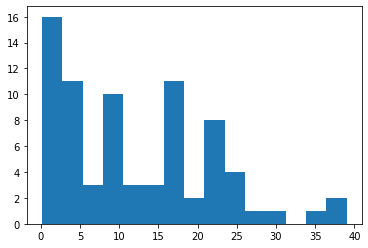

In [130]:
plt.hist(solteiras_com_pais['Idade'], bins=15)
plt.show()

**Média de mulheres "solteiras"**

In [131]:
data.loc[data['Titulo']=='Solteira']['Idade'].mean()

21.774238095238097

**Distribuição das idade de mulheres "solteiras"**

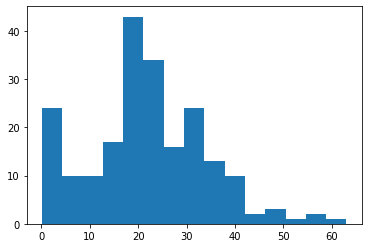

In [132]:
plt.hist(data.loc[data['Titulo']=='Solteira']['Idade'], bins=15)
plt.show()

**Média de mulheres "casadas"**

In [133]:
data.loc[data['Titulo']=='Casada']['Idade'].mean()

36.99411764705882

**Distribuição das idade de mulheres "solteiras"**

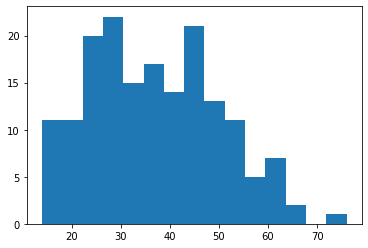

In [134]:
plt.hist(data.loc[data['Titulo']=='Casada']['Idade'], bins=15)
plt.show()

**Adicionar coluna "solteira com pais"**

In [135]:
solteiras_com_pais.index

Int64Index([  11,   25,   44,   59,   69,   72,   89,  120,  129,  137,  148,
             173,  181,  185,  206,  230,  234,  238,  298,  312,  319,  330,
             342,  357,  375,  382,  410,  418,  420,  436,  437,  447,  449,
             470,  480,  486,  531,  536,  540,  541,  542,  543,  581,  586,
             594,  616,  619,  635,  643,  645,  652,  690,  692,  703,  721,
             743,  751,  793,  814,  836,  853,  854,  864,  889,  918,  944,
             945, 1009, 1017, 1032, 1067, 1078, 1080, 1095, 1106, 1130, 1142,
            1155, 1175, 1176, 1188, 1218, 1246, 1277, 1294, 1301],
           dtype='int64', name='PassengerId')

In [136]:
data['solteiras_com_pais'] = 0

In [137]:
data['solteiras_com_pais']

PassengerId
1       0
2       0
3       0
4       0
5       0
       ..
1305    0
1306    0
1307    0
1308    0
1309    0
Name: solteiras_com_pais, Length: 1309, dtype: int64

In [138]:
for index, _ in data.iterrows():
  if index in solteiras_com_pais.index:
    data['solteiras_com_pais'].at[index] = 1

In [139]:
data.loc[data['solteiras_com_pais']==1]['Idade'].mean()

12.178815789473683

In [140]:
data.loc[data['solteiras_com_pais']==0]['Idade'].mean()

31.26812371134021

**Transformando recursos categóricos em "dummies"**

In [141]:
data.head()

,Classe,Sexo,Idade,IrmaosConjuge,PaisFilhos,Tarifa,Embarque,Titulo,solteiras_com_pais
PassengerId,,,,,,,,,
1,3,homem,22.0,1,0,7.2500,S,HomemAdulto,0
2,1,mulher,38.0,1,0,71.2833,C,Casada,0
3,3,mulher,26.0,0,0,7.9250,S,Solteira,0
4,1,mulher,35.0,1,0,53.1000,S,Casada,0
5,3,homem,35.0,0,0,8.0500,S,HomemAdulto,0


In [142]:
data['Sexo'] = data['Sexo'].map({'homem':0, 'mulher':1})

In [143]:
data.head()

,Classe,Sexo,Idade,IrmaosConjuge,PaisFilhos,Tarifa,Embarque,Titulo,solteiras_com_pais
PassengerId,,,,,,,,,
1,3,0,22.0,1,0,7.2500,S,HomemAdulto,0
2,1,1,38.0,1,0,71.2833,C,Casada,0
3,3,1,26.0,0,0,7.9250,S,Solteira,0
4,1,1,35.0,1,0,53.1000,S,Casada,0
5,3,0,35.0,0,0,8.0500,S,HomemAdulto,0


In [144]:
data = pd.get_dummies(data, columns=['Classe', 'Embarque', 'Titulo'], drop_first=True)

In [145]:
data.head()

,Sexo,Idade,IrmaosConjuge,PaisFilhos,Tarifa,solteiras_com_pais,Classe_2,Classe_3,Embarque_Q,Embarque_S,Titulo_HomemAdulto,Titulo_Menino,Titulo_Outros,Titulo_Solteira
PassengerId,,,,,,,,,,,,,,
1,0,22.0,1,0,7.2500,0,0,1,0,1,1,0,0,0
2,1,38.0,1,0,71.2833,0,0,0,0,0,0,0,0,0
3,1,26.0,0,0,7.9250,0,0,1,0,1,0,0,0,1
4,1,35.0,1,0,53.1000,0,0,0,0,1,0,0,0,0
5,0,35.0,0,0,8.0500,0,0,1,0,1,1,0,0,0


**Separar train e test para idades**


*   treinar com dados não nulos
*   aplicar modelos em dados nulos



In [146]:
data.isnull().sum()

Sexo                    0
Idade                 263
 IrmaosConjuge          0
PaisFilhos              0
Tarifa                  0
solteiras_com_pais      0
Classe_2                0
Classe_3                0
Embarque_Q              0
Embarque_S              0
Titulo_HomemAdulto      0
Titulo_Menino           0
Titulo_Outros           0
Titulo_Solteira         0
dtype: int64

In [147]:
train_idade = data.dropna()

In [148]:
test_idade = data.loc[data['Idade'].isnull()].drop('Idade', axis=1)

In [149]:
test_idade

,Sexo,IrmaosConjuge,PaisFilhos,Tarifa,solteiras_com_pais,Classe_2,Classe_3,Embarque_Q,Embarque_S,Titulo_HomemAdulto,Titulo_Menino,Titulo_Outros,Titulo_Solteira
PassengerId,,,,,,,,,,,,,
6,0,0,0,8.4583,0,0,1,1,0,1,0,0,0
18,0,0,0,13.0000,0,1,0,0,1,1,0,0,0
20,1,0,0,7.2250,0,0,1,0,0,0,0,0,0
27,0,0,0,7.2250,0,0,1,0,0,1,0,0,0
29,1,0,0,7.8792,0,0,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1300,1,0,0,7.7208,0,0,1,1,0,0,0,0,1
1302,1,0,0,7.7500,0,0,1,1,0,0,0,0,1
1305,0,0,0,8.0500,0,0,1,0,1,1,0,0,0


In [150]:
train_idade.shape, test_idade.shape

((1046, 14), (263, 13))

**Definindo X e y para treinar o modelo**

In [151]:
X = train_idade.drop('Idade', axis=1)

In [152]:
y = train_idade['Idade']

In [153]:
X.shape, y.shape

((1046, 13), (1046,))

**Importando modelo regressivo**

In [154]:
from sklearn import linear_model

**Instanciando o modelo**

In [155]:
lm = linear_model.LinearRegression()

**Importando train_test_split para preparar para treino**

In [156]:
from sklearn.model_selection import train_test_split

**Dividir 70% para treinar, 30% para testar**

In [157]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=123)

**Treinando o modelo**

In [158]:
X_train.shape, y_train.shape

((732, 13), (732,))

In [159]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [160]:
X_test.shape, y_test.shape

((314, 13), (314,))

**Fazer predição**

In [161]:
pred = lm.predict(X_test)
pred.shape

(314,)

**Importando mean_squared_error (erro quadrado médio)**

In [162]:
from sklearn.metrics import mean_squared_error

**Averiguar score**

In [163]:
lm.score(X_test, y_test)

0.4827170431956582

**Averiguar rmse**

In [164]:
mse = mean_squared_error(y_test, pred)

In [165]:
rmse = np.sqrt(mse)
rmse

10.342152976645297

**Visualizando resíduos em scatterplot**

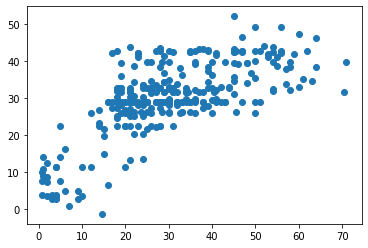

In [166]:
plt.scatter(y_test, pred)
plt.show()

**Aplicando modelos nos dados nulos**

In [167]:
test_idade.shape

(263, 13)

In [168]:
pred_idade = lm.predict(test_idade)

In [169]:
pred_idade.shape

(263,)

**Criar coluna idade contendos as predições**

In [170]:
test_idade['Idade'] = pred_idade

In [171]:
test_idade.isnull().sum()

Sexo                  0
 IrmaosConjuge        0
PaisFilhos            0
Tarifa                0
solteiras_com_pais    0
Classe_2              0
Classe_3              0
Embarque_Q            0
Embarque_S            0
Titulo_HomemAdulto    0
Titulo_Menino         0
Titulo_Outros         0
Titulo_Solteira       0
Idade                 0
dtype: int64

**Averiguar shapes**

In [172]:
test_idade.shape, train_idade.shape

((263, 14), (1046, 14))

**Concatenar dados**

In [173]:
idade = pd.concat([train_idade, test_idade], sort=False)

**Criar DataFrame contendo "IdPassageiro" e "Idade"**

In [174]:
idade.isnull().sum()

Sexo                  0
Idade                 0
 IrmaosConjuge        0
PaisFilhos            0
Tarifa                0
solteiras_com_pais    0
Classe_2              0
Classe_3              0
Embarque_Q            0
Embarque_S            0
Titulo_HomemAdulto    0
Titulo_Menino         0
Titulo_Outros         0
Titulo_Solteira       0
dtype: int64

In [175]:
idade.shape

(1309, 14)

In [178]:
idade_completa = pd.DataFrame({'IdPassageiro': idade.index, 'Idade': idade['Idade']})

In [179]:
idade_completa

,IdPassageiro,Idade
PassengerId,,
1,1,22.000000
2,2,38.000000
3,3,26.000000
4,4,35.000000
5,5,35.000000
...,...,...
1300,1300,25.139931
1302,1302,25.139668
1305,1305,29.076067


**Salvar CSV com idade completa**

In [181]:
idade_completa.to_csv('idade_completa.csv', index=False)
files.download('idade_completa.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [182]:
data_idade = pd.read_csv('idade_completa.csv')

In [183]:
data_idade

,IdPassageiro,Idade
0,1,22.000000
1,2,38.000000
2,3,26.000000
3,4,35.000000
4,5,35.000000
...,...,...
1304,1300,25.139931
1305,1302,25.139668
1306,1305,29.076067
1307,1308,29.076067
